# **1. 결정 트리**

- 3주차 branch에 있는 `car_evaluation.csv`를 다운받은 후 실습을 진행해 주세요.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **1-a. 'car_evaluation.csv'를 불러와 df에 저장해 주세요.**

In [ ]:
## Colab - 구글 드라이브 마운트
# Colab을 사용하시는 분들만 실행시켜 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv('/Users/jieun/Downloads/car_evaluation.csv')

## **1-b. df의 상위 5개 행을 확인해 주세요.**

In [3]:
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-c. ```info()```를 통해 데이터 정보를 확인해 주세요.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## **1-d. 컬럼명이 적절해 보이지 않네요. 컬럼명을 알맞게 변경해 주세요.**


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [6]:
# 데이터 재확인

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-e. 범주형 변수에 대해 Label Encoding을 수행해 주세요.**
- Hint: 파머완 p.118, 121~122

In [7]:
from sklearn.preprocessing import LabelEncoder
# 범주형 변수 리스트
cat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# 각 범주형 변수에 대해 레이블 인코딩 수행
#encoder.fit(cat)
#labels = encoder.transform(cat)

for features in cat:
    df[features] = encoder.fit_transform(df[features]) #float형으로 변환


In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


## **1-f. Feature(X)와 Target(y)를 분리해 주세요.**
- target(y) 변수: class

In [9]:
X = df.drop('class', axis=1)
y = df['class']

## **1-g. ```train_test_split()```을 사용하여 훈련 세트와 테스트 세트로 나눠주세요.**
(random_state = 42, train: test = 8:2)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **1-h. ```DecisionTreeClassifier```를 사용해 훈련 데이터를 fit 한 후, 테스트 데이터로 예측의 정확도를 구하세요.**
(DecisionTreeClassifer의 random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
dt_pred = clf.predict(X_test)
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

정확도 : 0.9711


## **1-i. GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.**
- Hint: 파머완 p.113, 207


```
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}
```



In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

grid_clf = GridSearchCV(clf, param_grid=params, cv=3, refit=True)
grid_clf.fit(X_train, y_train)

print('GridSearch 최적 파라미터:', grid_clf.best_params_)

GridSearch 최적 파라미터: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


## **1-j. 최적화 된 모델로 테스트 데이터 세트에 대해 예측을 수행해 주세요.**

In [15]:
estimator = grid_clf.best_estimator_
pred = estimator.predict(X_test)

# **2. 서포트 벡터 머신**

## **2-a. split된 자동차 평가 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요.**
(C = 10)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [17]:
svm_clf = SVC(kernel='linear', C=10, random_state=42)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, svm_pred)
print('정확도 : {0:.4f}'.format(accuracy))

정확도 : 0.7110


## **2-b. 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.**
(cv = 5)

In [18]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [19]:
grid_search = GridSearchCV(svm_clf, param_grid=param, cv=5)
grid_search.fit(X_train, y_train)

print('GridSearch 최적의 C 값:', grid_search.best_params_['C'])
print('GridSearch 최고 score:', grid_search.best_score_)

GridSearch 최적의 C 값: 5
GridSearch 최고 score: 0.7299011144247369


## **2-c. 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.**
Hint: `best_estimator_`

In [20]:
estimator = grid_search.best_estimator_
pred = estimator.predict(X_test)
print('정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

정확도: 0.7081


## **2-d. GridSearchCV를 이용하여 최적의 `gamma`, `C` 값을 찾아 최적 가우시안 SVM 모델을 만들고, fit 하세요.**
(가우시안 svm: kernel = 'rbf')

In [21]:
params = {'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [22]:
svm_rbf_clf = SVC(kernel='rbf', random_state=42)
grid_search_rbf = GridSearchCV(svm_rbf_clf, param_grid=params, cv=5)
grid_search_rbf.fit(X_train, y_train)

print('GridSearch 최적의 C 값:', grid_search_rbf.best_params_['C'])
print('GridSearch 최고 score:', grid_search_rbf.best_score_)

best_rbf_svm = grid_search_rbf.best_estimator_
best_rbf_svm.fit(X_train, y_train)

GridSearch 최적의 C 값: 40
GridSearch 최고 score: 0.9869617537801497


SVC(C=40, gamma=0.25, random_state=42)

# **3. 앙상블**

## **3-a. breast_cancer 데이터셋을 ```load()``` 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠주세요.**
(test_size = 0.2, random_state = 42)




In [23]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [24]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3-b. 로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)
- 로지스틱 회귀: solver = "liblinear"
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=16)
dt_clf = DecisionTreeClassifier(random_state=12)

classifiers = [lr_clf, knn_clf, dt_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9561
KNeighborsClassifier 정확도: 0.9649
DecisionTreeClassifier 정확도: 0.9386


## **3-c. 로지스틱 회귀와 결정 트리를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [27]:
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('DT', dt_clf)])

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9298


## **3-d. KNN과 결정트리를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해보세요.**
(평가는 정확도가 출력되도록 해주세요.)

In [28]:
from sklearn.ensemble import VotingClassifier
vo_clf = VotingClassifier(estimators=[('KNN', knn_clf), ('DT', dt_clf)], voting='soft')
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9386


# **4. 랜덤 포레스트**

## **4-a. RandomForestClassifier를 이용하여 훈련 데이터를 fit한 후, 테스트 셋으로 예측 정확도를 구하세요.**
(random_state = 42, max_depth = 8)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [30]:
rf_clf = RandomForestClassifier(random_state=42, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9649


## **4-b. GridSearchCV를 사용하여 최적의 하이퍼 파라미터 조합을 찾으세요.**
(cv = 2, n_jobs = -1)

In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [1, 2, 4,8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

In [32]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('GridSearch 최적 파라미터:', grid_cv.best_params_)

GridSearch 최적 파라미터: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}


## **4-c. 위에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 정확도를 측정해 보세요.**


In [33]:
best_rf_clf = grid_cv.best_estimator_
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth=8, min_samples_split=8)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9561


## **4-d. ```feature_importances_``` 속성을 이용하여 전체 feature의 피처 주요도를 막대 그래프로 시각화 해보세요.**
(index = cancer.feature_names)  
Hint: 파머완 p.210

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

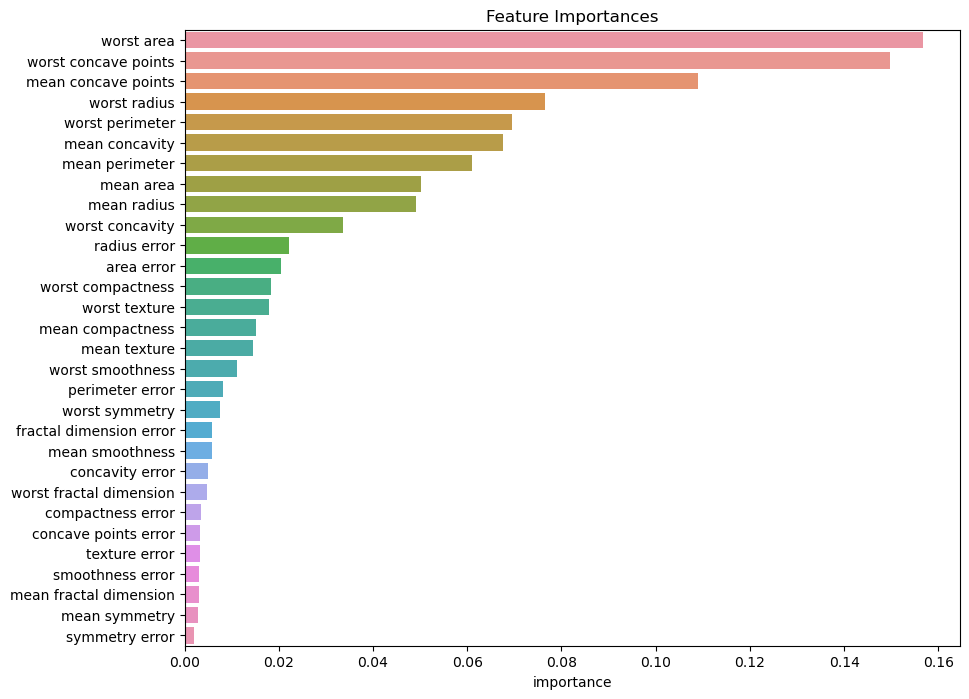

In [35]:
feature_importances = best_rf_clf.feature_importances_
df_importance = pd.DataFrame(feature_importances, index=cancer.feature_names, columns=['importance'])
df_importance = df_importance.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x=df_importance['importance'], y=df_importance.index)
plt.show()